In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis=1, inplace=True)
print(titanic_df.head(5))

   Survived  Pclass     Sex   Age  SibSp     Fare Cabin Embarked
0         0       3    male  22.0      1   7.2500   NaN      NaN
1         1       1  female  38.0      1  71.2833   C85        C
2         1       3  female  26.0      0   7.9250   NaN      NaN
3         1       1  female  35.0      1  53.1000  C123      NaN
4         0       3    male  35.0      0   8.0500   NaN        S


In [10]:
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})
print(titanic_df.head(5))

   Survived  Pclass     Sex   Age  SibSp     Fare Cabin Embarked
0      Died       3    male  22.0      1   7.2500   NaN      NaN
1  Survived       1  female  38.0      1  71.2833   C85        C
2  Survived       3  female  26.0      0   7.9250   NaN      NaN
3  Survived       1  female  35.0      1  53.1000  C123      NaN
4      Died       3    male  35.0      0   8.0500   NaN        S


In [11]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
print("======Data Headers After Filling with default value for Embarked Column =======")
print(titanic_df.head(5))

======Data Headers After Filling with default value for Embarked Column =======
   Survived  Pclass     Sex   Age  SibSp     Fare Cabin Embarked
0      Died       3    male  22.0      1   7.2500   NaN        S
1  Survived       1  female  38.0      1  71.2833   C85        C
2  Survived       3  female  26.0      0   7.9250   NaN        S
3  Survived       1  female  35.0      1  53.1000  C123        S
4      Died       3    male  35.0      0   8.0500   NaN        S





**** DATA VISUALIZATIONS****


Visualization #1 : Survival Rate Based on Passenger Sitting Class


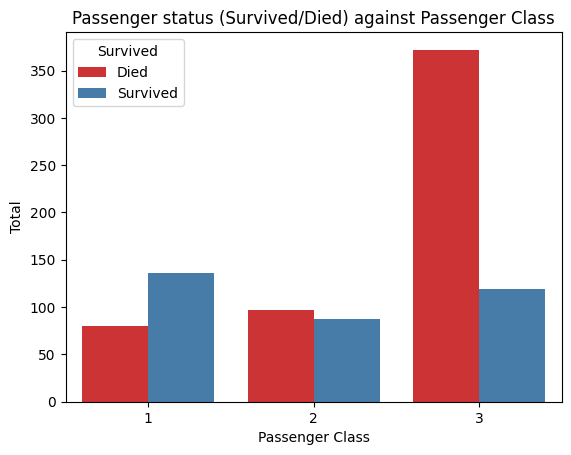

In [12]:
print("\n\n\n**** DATA VISUALIZATIONS****\n\n")
print("Visualization #1 : Survival Rate Based on Passenger Sitting Class")
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show() 

Visualization #2 : Survival Rate Based on Gender
Survived  Died  Survived
Sex                     
female      81       233
male       468       109


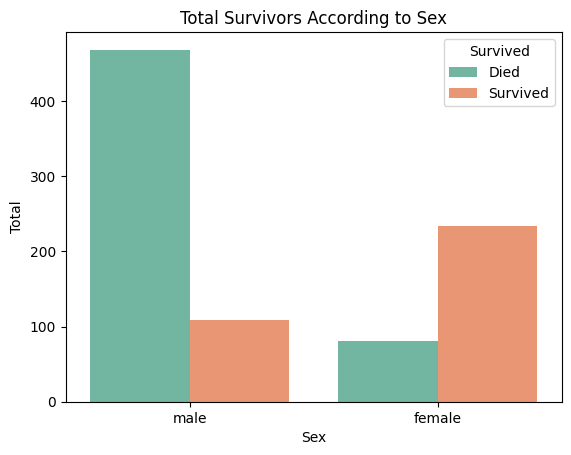

In [13]:
print("Visualization #2 : Survival Rate Based on Gender")
print(pd.crosstab(titanic_df["Sex"],titanic_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = titanic_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()


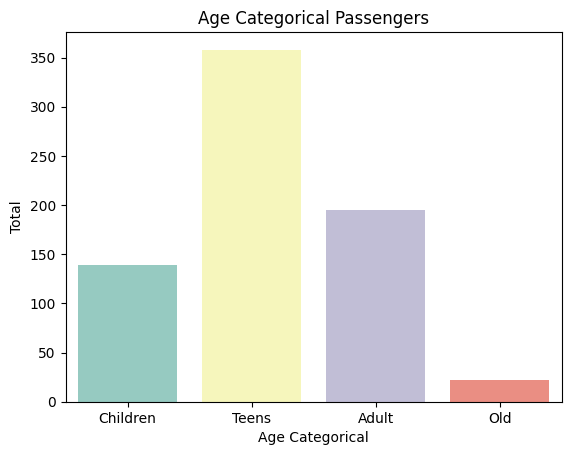

In [15]:
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
#cut - Segment and sort data values into bins
titanic_df['Age_cats'] = pd.cut(titanic_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = titanic_df,palette = 'Set3')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Passengers")
plt.show()